Importing the required Libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

Lets load the dataset in a variable.

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/shrikant-temburwar/Wine-Quality-Dataset/refs/heads/master/winequality-white.csv", sep=";")

Let's check our columns.

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


As we can see our dataset has 11 Columns.

Lets check basic info of our dataset.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


Lets check statistical measures od the columns.

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,4898.0,6.854788,0.843868,3.80000,6.300000,6.80000,7.3000,14.20000
volatile acidity,4898.0,0.278241,0.100795,0.08000,0.210000,0.26000,0.3200,1.10000
citric acid,4898.0,0.334192,0.121020,0.00000,0.270000,0.32000,0.3900,1.66000
residual sugar,4898.0,6.391415,5.072058,0.60000,1.700000,5.20000,9.9000,65.80000
chlorides,4898.0,0.045772,0.021848,0.00900,0.036000,0.04300,0.0500,0.34600
free sulfur dioxide,4898.0,35.308085,17.007137,2.00000,23.000000,34.00000,46.0000,289.00000
total sulfur dioxide,4898.0,138.360657,42.498065,9.00000,108.000000,134.00000,167.0000,440.00000
density,4898.0,0.994027,0.002991,0.98711,0.991723,0.99374,0.9961,1.03898
pH,4898.0,3.188267,0.151001,2.72000,3.090000,3.18000,3.2800,3.82000
sulphates,4898.0,0.489847,0.114126,0.22000,0.410000,0.47000,0.5500,1.08000


Lets plot histograms for each columns to see their distribution.

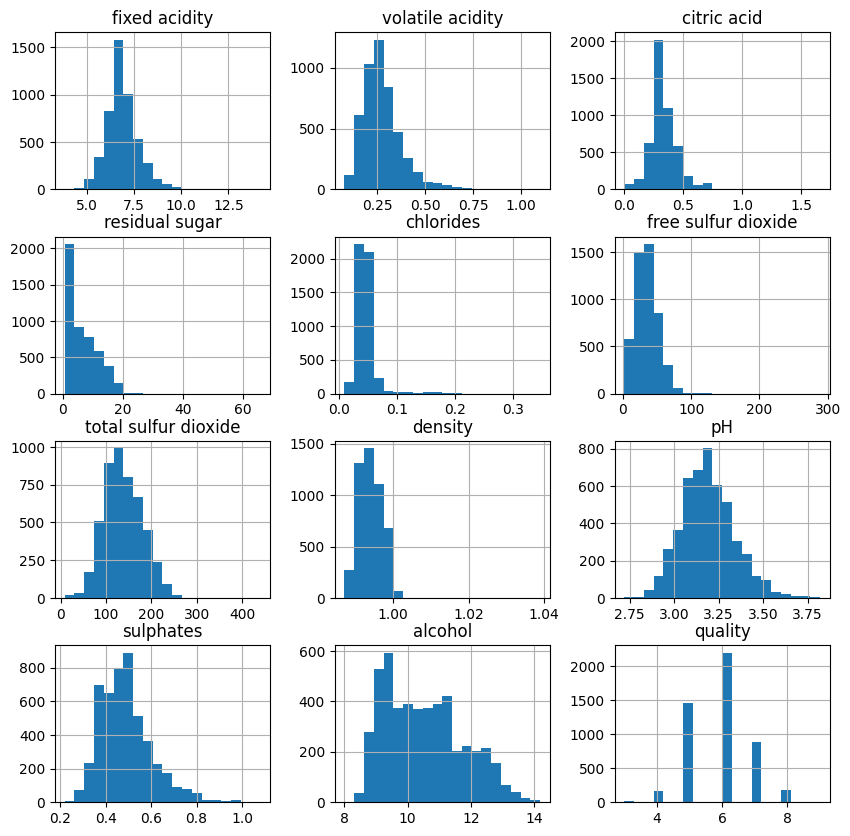

In [6]:
df.hist(bins=20, figsize=(10, 10))
plt.show()

Now lets check our samples count for each classes.

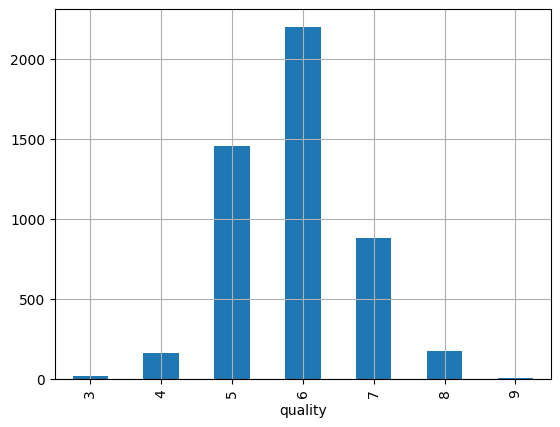

In [7]:
df['quality'].value_counts().sort_index().plot(kind='bar', grid = True);

Lets check for correlated features

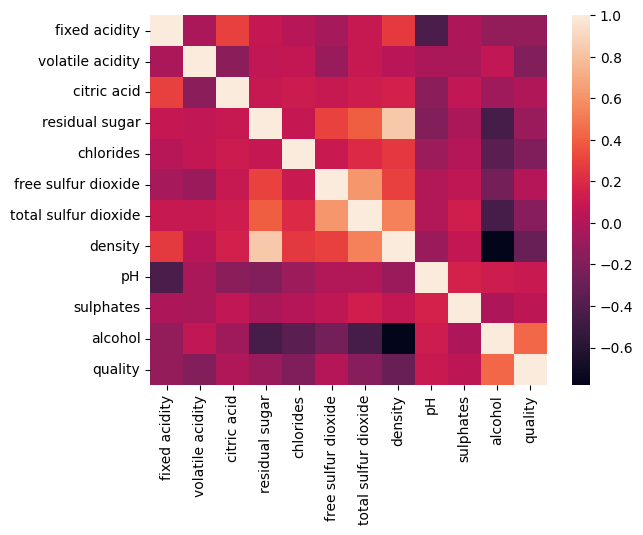

In [8]:
sns.heatmap(df.corr());

As we can see **density** and **residual sugar** are highly correlated. It is intuitive also as excess suger will definately increase the density of fluid.

we will drop **"residual sugar"** column

In [9]:
df = df.drop(columns='residual sugar')

Now we will prepare our data for the model training

We will do a binary classification

In [10]:
df['best'] = df['quality'].apply(lambda x: 1 if x > 6 else 0)

We will drop the previous quality column

In [11]:
df = df.drop(columns='quality')

We will split our data for training and testing

In [12]:
X = df.drop(columns='best')
y = df['best']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y,random_state=42)

Lets check the shape of the train and test splits

In [14]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3918, 10), (980, 10), (3918,), (980,))

Now We will train the XGBoost classifier

In [15]:
model = XGBClassifier(random_state=42, n_jobs=-1, )
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, random_state=42, ...)

In [16]:
print(f"Model accuracy on train set: {model.score(X_train, y_train)}")
print(f"Model accuracy on test set: {model.score(X_test, y_test)}")

Model accuracy on train set: 0.9989790709545686
Model accuracy on test set: 0.8826530612244898


Lets train a Random Forest Classifier

In [17]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42, n_jobs=-1)
model.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [18]:
print(f"Model accuracy on train set: {model.score(X_train, y_train)}")
print(f"Model accuracy on test set: {model.score(X_test, y_test)}")

Model accuracy on train set: 1.0
Model accuracy on test set: 0.8857142857142857


Lets lot confusion matrix for the model

In [19]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

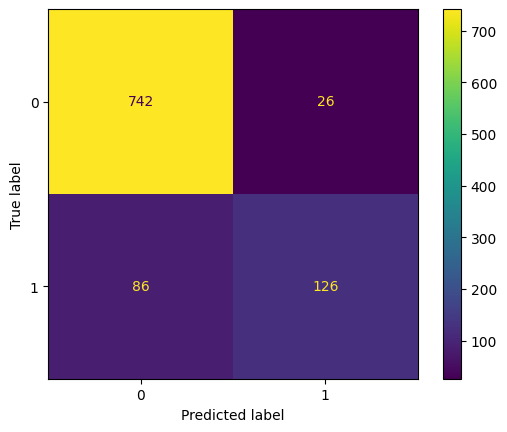

In [20]:
cm = confusion_matrix(y_test, model.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

Lets also see classification report

In [21]:
from sklearn.metrics import classification_report

In [22]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93       768
           1       0.83      0.59      0.69       212

    accuracy                           0.89       980
   macro avg       0.86      0.78      0.81       980
weighted avg       0.88      0.89      0.88       980



Our model performance for class 1 is poor at the current threshold. we will cheng the threshold with different values and check out model performace

Lets check our model performance for class 1 for different threshold values

In [23]:
thresholds = np.arange(0.2, 0.85, 0.05)
thresholds

array([0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 , 0.65, 0.7 ,
       0.75, 0.8 ])

In [24]:
precision_scores = []
recall_scores = []
accuracy_scores = []

In [25]:
y_pred_proba = model.predict_proba(X_test)[:, 1]

In [27]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

for threshold in thresholds:
    y_pred_at_threshold = (y_pred_proba >= threshold).astype(int)

    current_accuracy = accuracy_score(y_test, y_pred_at_threshold)
    current_precision = precision_score(y_test, y_pred_at_threshold, zero_division=0)
    current_recall = recall_score(y_test, y_pred_at_threshold, zero_division=0)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    recall_scores.append(current_recall)

    print(f"Threshold: {threshold:.2f} | Accuracy: {current_accuracy:.4f} | Precision: {current_precision:.4f} | Recall: {current_recall:.4f}")

Threshold: 0.20 | Accuracy: 0.7837 | Precision: 0.5000 | Recall: 0.9009
Threshold: 0.25 | Accuracy: 0.8102 | Precision: 0.5387 | Recall: 0.8538
Threshold: 0.30 | Accuracy: 0.8469 | Precision: 0.6069 | Recall: 0.8302
Threshold: 0.35 | Accuracy: 0.8663 | Precision: 0.6552 | Recall: 0.8066
Threshold: 0.40 | Accuracy: 0.8847 | Precision: 0.7181 | Recall: 0.7689
Threshold: 0.45 | Accuracy: 0.8898 | Precision: 0.7737 | Recall: 0.6934
Threshold: 0.50 | Accuracy: 0.8857 | Precision: 0.8247 | Recall: 0.5991
Threshold: 0.55 | Accuracy: 0.8847 | Precision: 0.8561 | Recall: 0.5613
Threshold: 0.60 | Accuracy: 0.8806 | Precision: 0.8800 | Recall: 0.5189
Threshold: 0.65 | Accuracy: 0.8776 | Precision: 0.9182 | Recall: 0.4764
Threshold: 0.70 | Accuracy: 0.8714 | Precision: 0.9574 | Recall: 0.4245
Threshold: 0.75 | Accuracy: 0.8612 | Precision: 0.9750 | Recall: 0.3679
Threshold: 0.80 | Accuracy: 0.8429 | Precision: 0.9677 | Recall: 0.2830


Lets see how our model performs for different threshold values for class 1

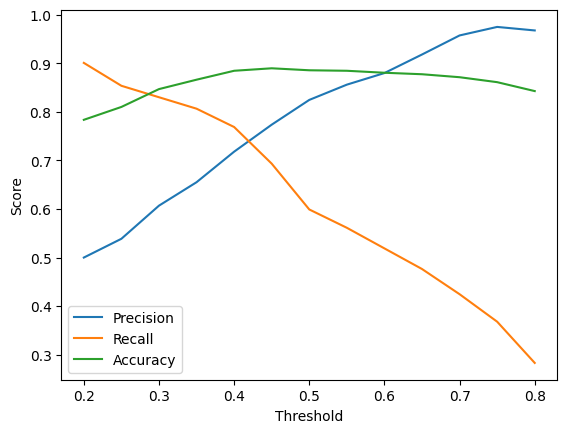

In [28]:
plt.plot(thresholds, precision_scores, label='Precision')
plt.plot(thresholds, recall_scores, label='Recall')
plt.plot(thresholds, accuracy_scores, label='Accuracy')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.show()

It seems like our model is performing best at threshold aroud 0.45

Lets check accuracy, recall and precision at this threshold and create a condusion matrix

In [29]:
print(f"Accuracy: {accuracy_score(y_test, (y_pred_proba >= 0.45).astype(int))}")
print(f"Precision: {precision_score(y_test, (y_pred_proba >= 0.45).astype(int), zero_division=0)}")
print(f"Recall: {recall_score(y_test, (y_pred_proba >= 0.45).astype(int), zero_division=0)}")

Accuracy: 0.889795918367347
Precision: 0.7736842105263158
Recall: 0.6933962264150944


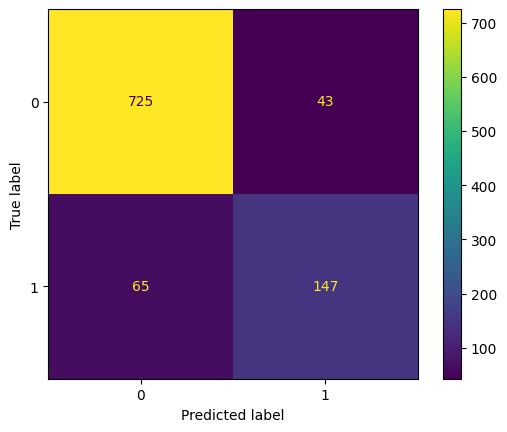

In [30]:
cm = confusion_matrix(y_test, (y_pred_proba >= 0.45).astype(int))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

Lets compare compare classification report for original threshold value (0.5) and 0.45 side by side

In [31]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93       768
           1       0.83      0.59      0.69       212

    accuracy                           0.89       980
   macro avg       0.86      0.78      0.81       980
weighted avg       0.88      0.89      0.88       980



In [32]:
print(classification_report(y_test, (y_pred_proba >= 0.45).astype(int)))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       768
           1       0.77      0.69      0.73       212

    accuracy                           0.89       980
   macro avg       0.85      0.82      0.83       980
weighted avg       0.89      0.89      0.89       980



As we can see our model is doing little better for class 1